In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [17]:
train = pd.read_excel("Training Dataset.xlsx")

In [18]:
train.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [19]:
len(train)

64006

In [20]:
len(train[train['Total']>24])

18672

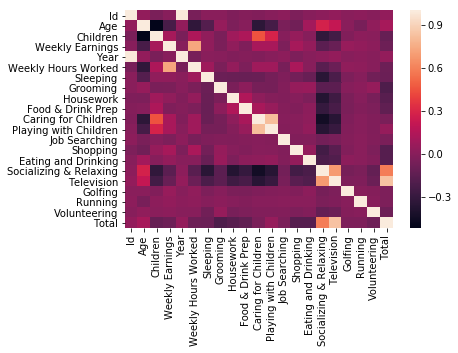

In [21]:
sns.heatmap(train[train['Total']>24].corr());

In [63]:
activities_corr = train[train['Total'] > 24].loc[:,'Weekly Hours Worked':'Volunteering'].corr()

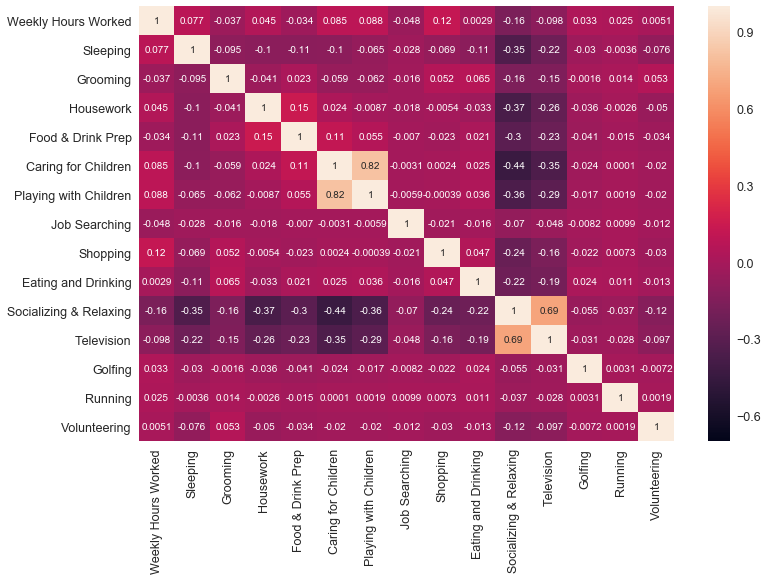

In [64]:
plt.pyplot.subplots(figsize=(12,8))
sns.heatmap(activities_corr, annot=True, annot_kws={'size':10}, vmin=-0.7);

In [75]:
for index, row in activities_corr.iterrows():
    for col in activities_corr.columns.values:
        if 0.5 < row[col] < 1 :
            print(row[col])
            print(row.name)
            print(col+'\n')

0.8190478136630778
Caring for Children
Playing with Children

0.8190478136630778
Playing with Children
Caring for Children

0.6885248284246341
Socializing & Relaxing
Television

0.6885248284246341
Television
Socializing & Relaxing



In [76]:
for index, row in activities_corr.iterrows():
    for col in activities_corr.columns.values:
        if -1 < row[col] < -0.4:
            print(row[col])
            print(row.name)
            print(col+'\n')

-0.4402084686001523
Caring for Children
Socializing & Relaxing

-0.4402084686001523
Socializing & Relaxing
Caring for Children



In [77]:
for index, row in activities_corr.iterrows():
    for col in activities_corr.columns.values:
        if -0.4 < row[col] < -0.3:
            print(row[col])
            print(row.name)
            print(col+'\n')

-0.3472287974186482
Sleeping
Socializing & Relaxing

-0.37190630499245647
Housework
Socializing & Relaxing

-0.3518692495579351
Caring for Children
Television

-0.35524206167680733
Playing with Children
Socializing & Relaxing

-0.3472287974186482
Socializing & Relaxing
Sleeping

-0.37190630499245647
Socializing & Relaxing
Housework

-0.35524206167680733
Socializing & Relaxing
Playing with Children

-0.3518692495579351
Television
Caring for Children

